<a href="https://colab.research.google.com/github/Faisfaiz/machine-learning/blob/main/Weeks%205/EDA(Diamonds).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Faishal Anwar
1103204096

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

In [4]:
file_path = "/content/diamonds.csv"

data = pd.read_csv(file_path)

data

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [6]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
x = (data.x == 0).sum()
y = (data.y == 0).sum()
z = (data.z == 0).sum()

print("Nilai 0 di kolom x ada: ", x)
print("Nilai 0 di kolom y ada: ", y)
print("Nilai 0 di kolom z ada: ", z)

Nilai 0 di kolom x ada:  8
Nilai 0 di kolom y ada:  7
Nilai 0 di kolom z ada:  20


In [8]:
data.loc[(data['z']==0)]

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2207,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [9]:
data = data.loc[(data[['x','y','z']]!=0).all(axis=1)]

data.shape

(53920, 11)

In [10]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,26972.355731,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,15571.269010,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,1.000000,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,13487.750000,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,26973.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40457.250000,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<Axes: xlabel='carat'>

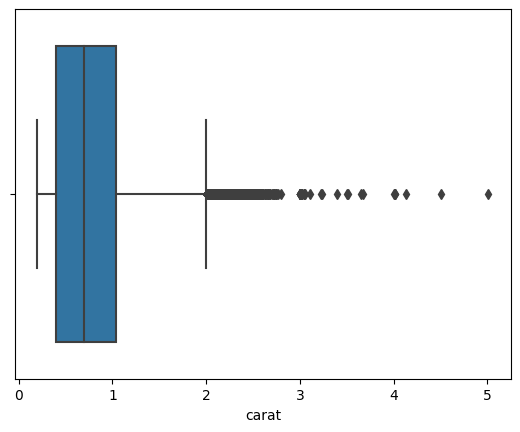

In [11]:
sns.boxplot(x=data['carat'])

<Axes: xlabel='depth'>

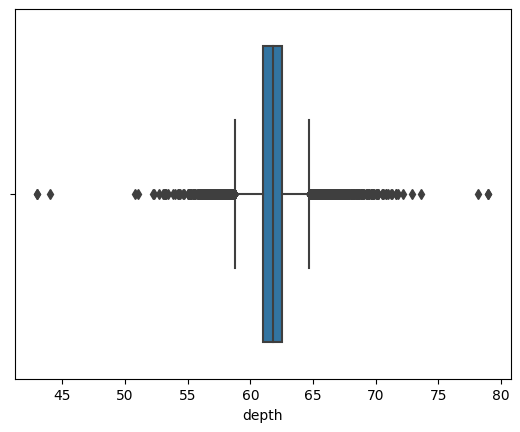

In [12]:
sns.boxplot(x=data['depth'])

<Axes: xlabel='table'>

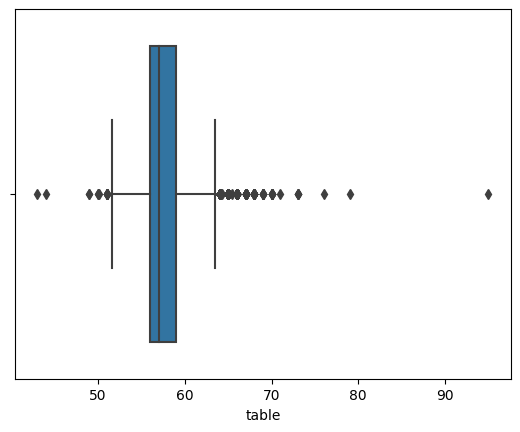

In [13]:
sns.boxplot(x=data['table'])

<Axes: xlabel='price'>

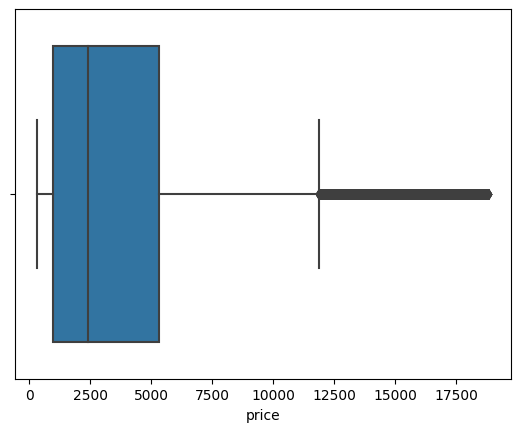

In [14]:
sns.boxplot(x=data['price'])

<Axes: xlabel='x'>

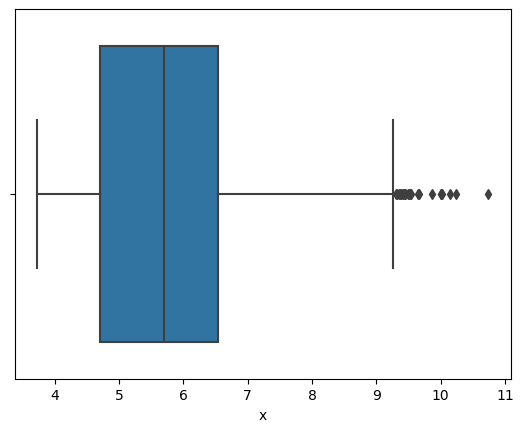

In [15]:
sns.boxplot(x=data['x'])

<Axes: xlabel='y'>

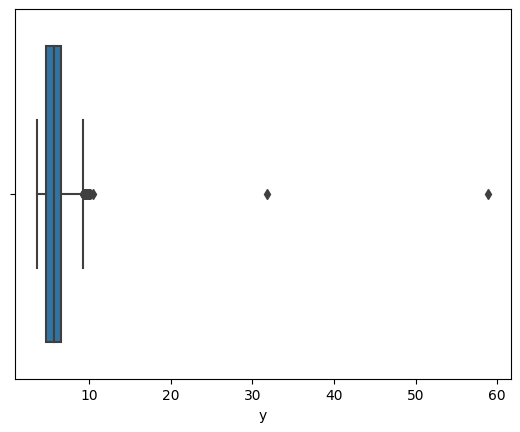

In [16]:
sns.boxplot(x=data['y'])

<Axes: xlabel='z'>

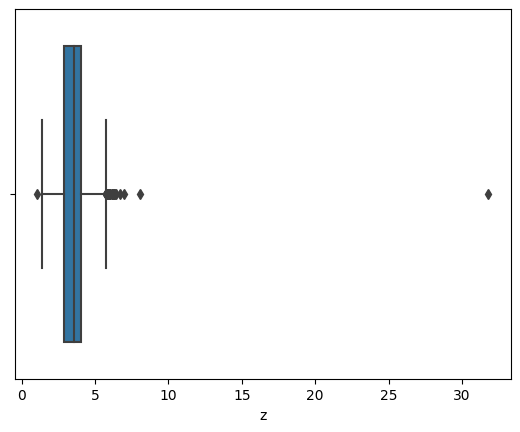

In [17]:
sns.boxplot(x=data['z'])

In [18]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR=Q3-Q1
data=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]

data.shape

<ipython-input-18-d7f83a26093a>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
<ipython-input-18-d7f83a26093a>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
<ipython-input-18-d7f83a26093a>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]


(47524, 11)

<Axes: xlabel='y'>

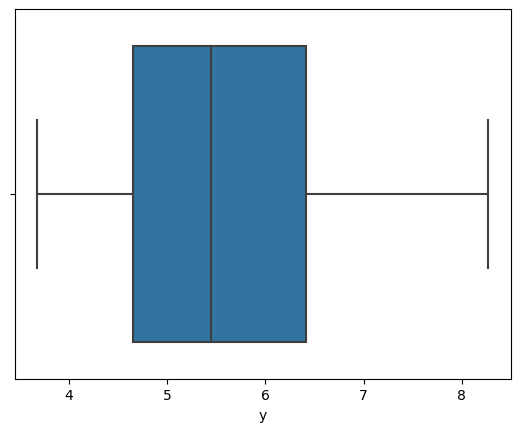

In [19]:
sns.boxplot(x=data['y'])

In [20]:
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

           jumlah sampel  persentase
Ideal              20340        42.8
Premium            12115        25.5
Very Good          10994        23.1
Good                3745         7.9
Fair                 330         0.7


<Axes: title={'center': 'cut'}>

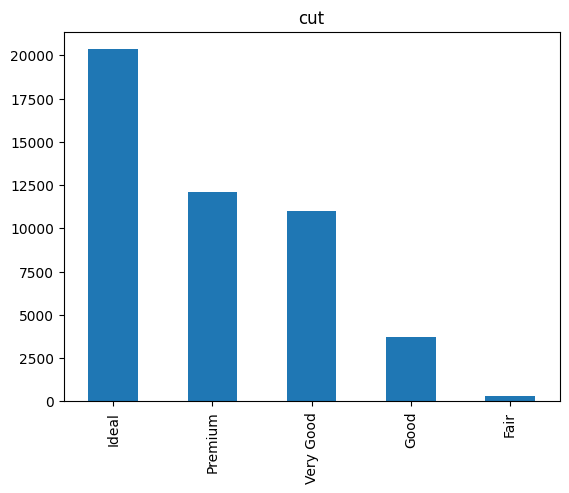

In [21]:
feature = categorical_features[0]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature)

   jumlah sampel  persentase
G          10081        21.2
E           8910        18.7
F           8466        17.8
H           7176        15.1
D           6195        13.0
I           4462         9.4
J           2234         4.7


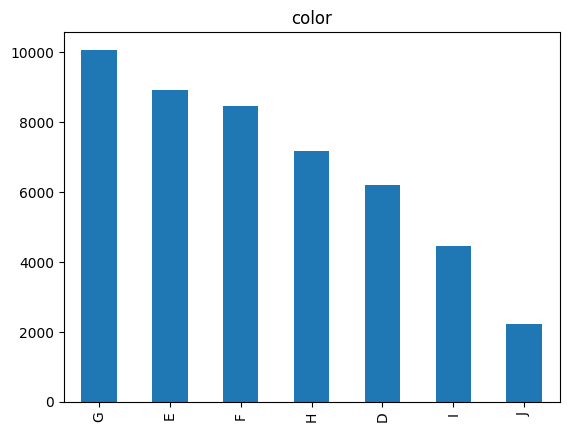

In [22]:
feature = categorical_features[1]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

      jumlah sampel  persentase
SI1           11552        24.3
VS2           10928        23.0
SI2            7402        15.6
VS1            7373        15.5
VVS2           4683         9.9
VVS1           3463         7.3
IF             1650         3.5
I1              473         1.0


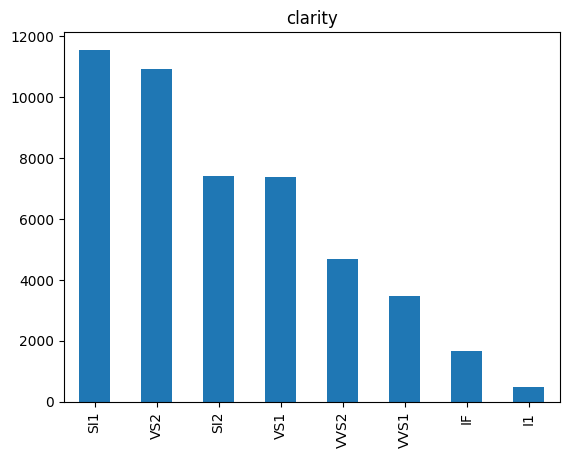

In [23]:
feature = categorical_features[2]
count = data[feature].value_counts()
percent = 100*data[feature].value_counts(normalize=True)
df = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

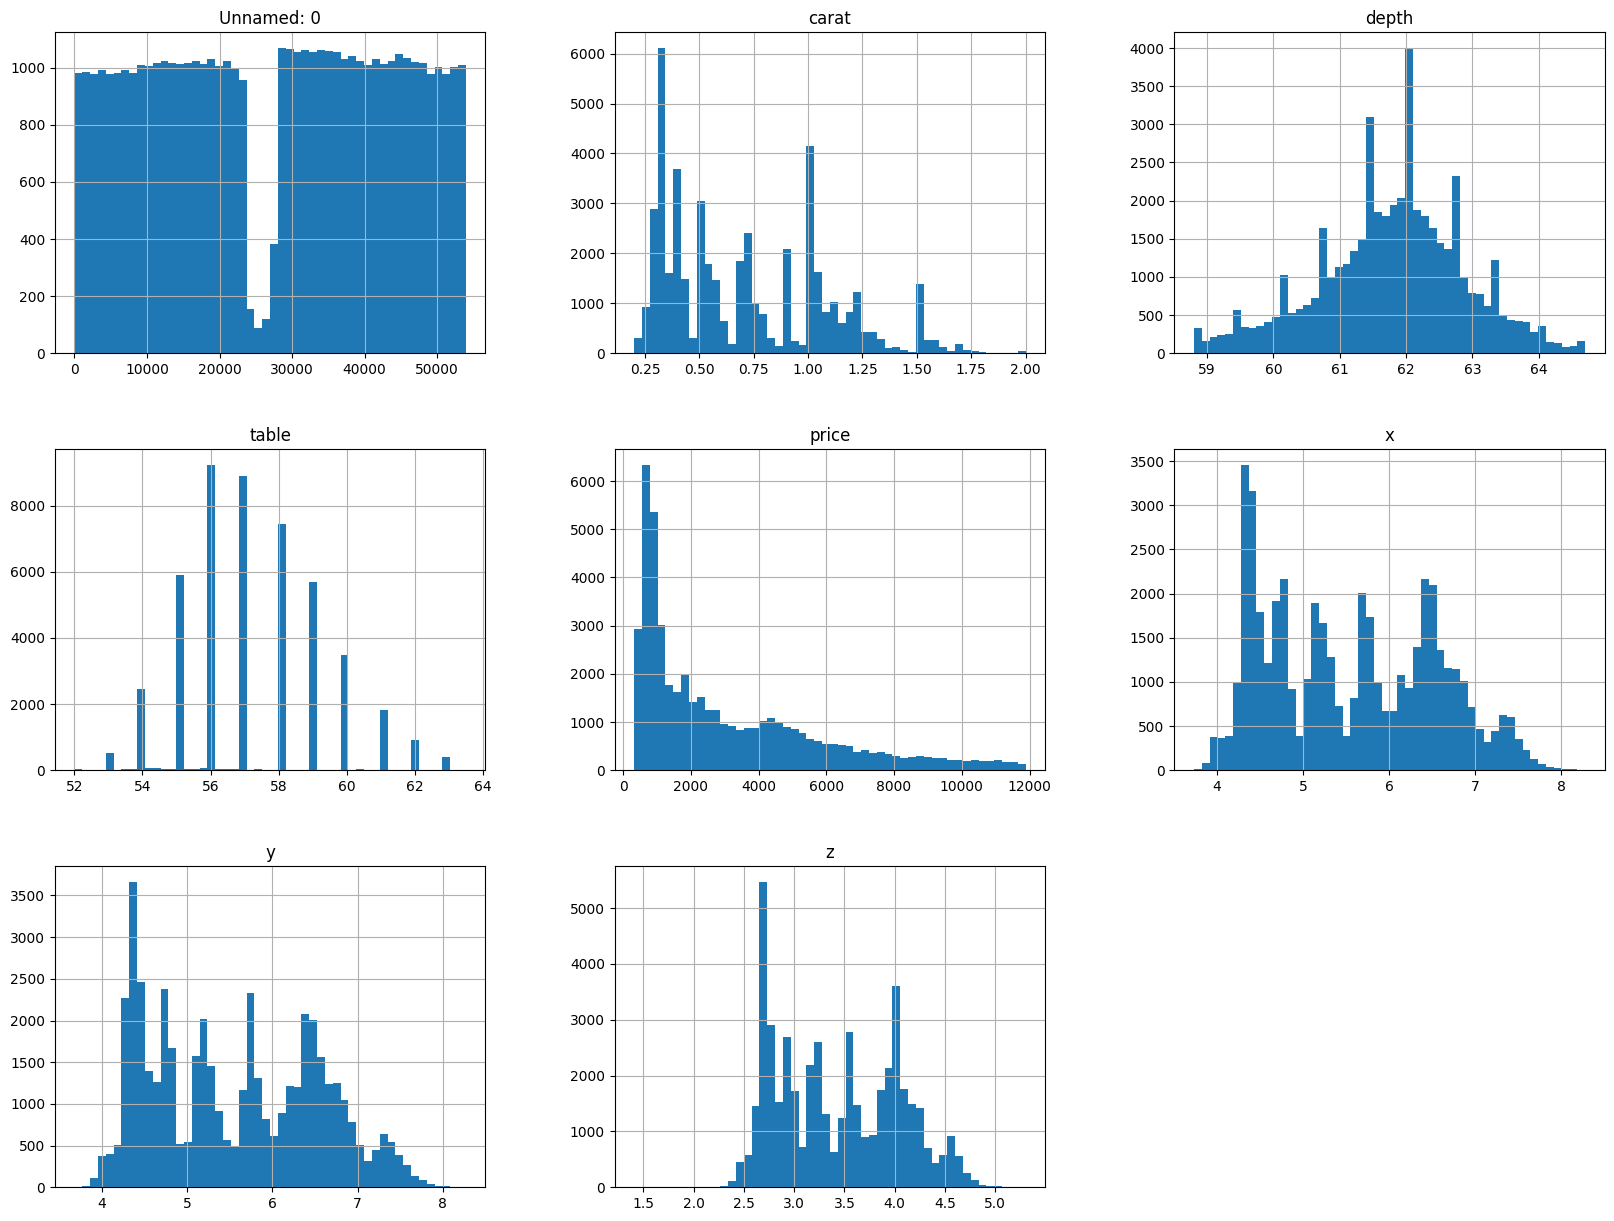

In [24]:
data.hist(bins=50, figsize=(20,15))
plt.show()

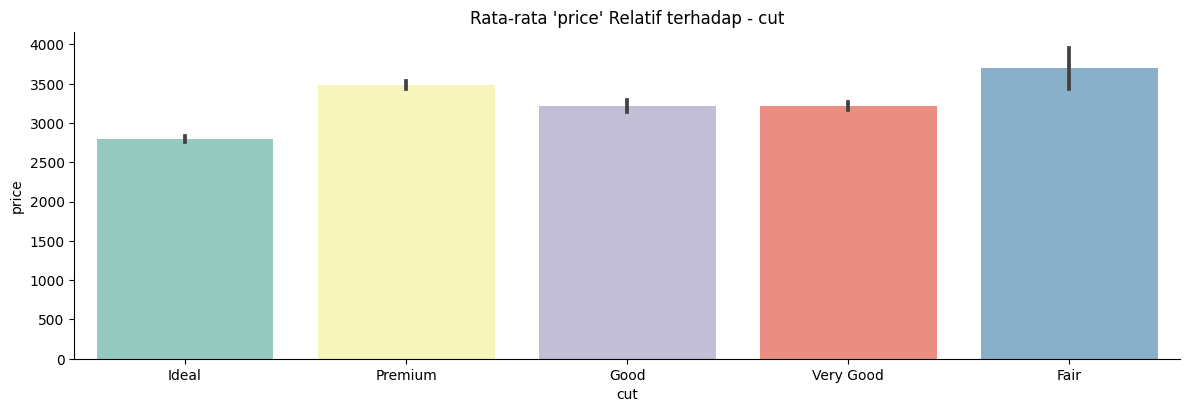

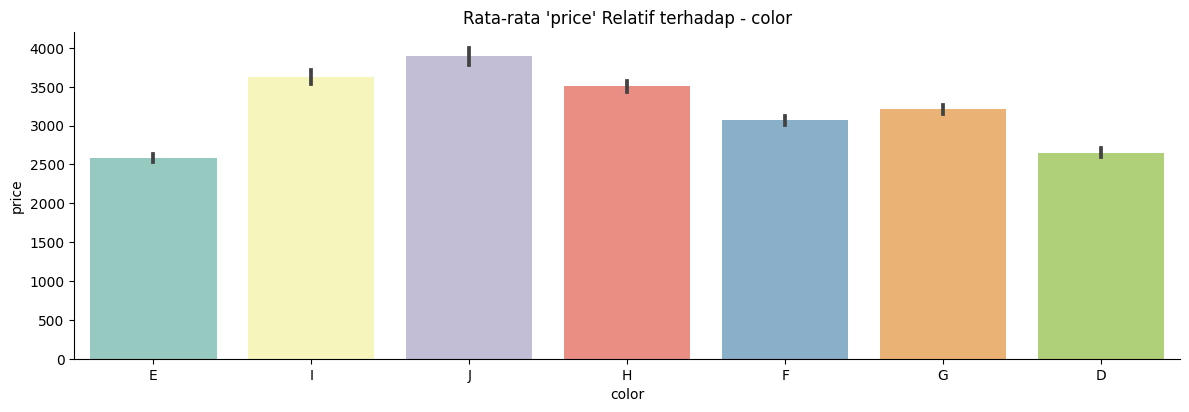

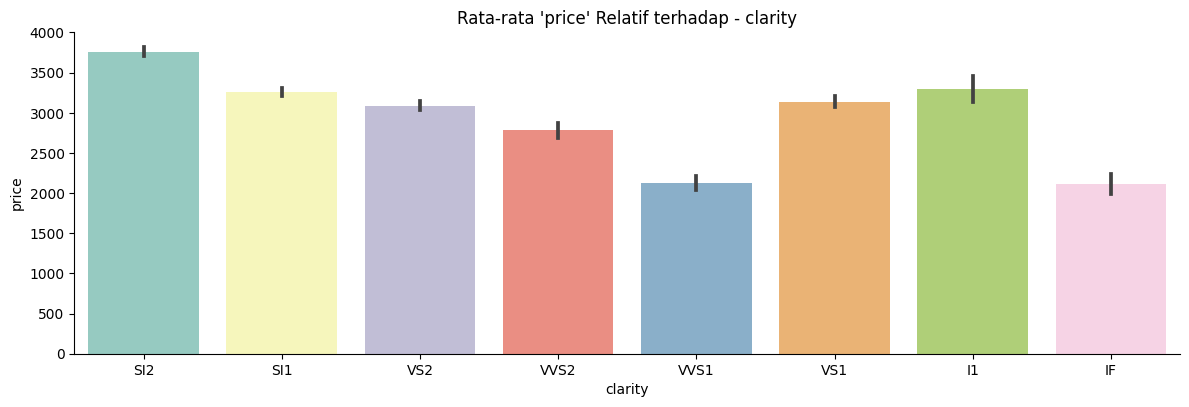

In [25]:
cat_features = data.select_dtypes(include='object').columns.to_list()

for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=data, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

In [ ]:
sns.pairplot(data, diag_kind = 'kde')

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("correlation matrix fitur Numerik ", size=20)

In [ ]:
data.drop(['depth'], inplace=True, axis=1)
data.head()

In [ ]:
data = pd.concat([data, pd.get_dummies(data['cut'], prefix='cut', drop_first=True)], axis=1)
data = pd.concat([data, pd.get_dummies(data['color'], prefix='color', drop_first=True)], axis=1)
data = pd.concat([data, pd.get_dummies(data['clarity'], prefix='clarity', drop_first=True)], axis=1)
data.drop(['cut','color','clarity'], axis=1, inplace=True)
data.head()

In [ ]:
sns.pairplot(data[['x','y','z']], plot_kws={"s": 3});

In [ ]:
pca = PCA(n_components=3, random_state=123)
pca.fit(data[['x','y','z']])
princ_comp = pca.transform(data[['x','y','z']])

In [ ]:
pca.explained_variance_ratio_.round(3)

In [ ]:
pca = PCA(n_components=1, random_state=123)
pca.fit(data[['x','y','z']])
data['dimension'] = pca.transform(data.loc[:, ('x','y','z')]).flatten()
data.drop(['x','y','z'], axis=1, inplace=True)

In [ ]:
X = data.drop(["price"], axis=1)
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=123)

In [ ]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in whole dataset: {len(X_train)}')
print(f'Total # of sample in whole dataset: {len(X_test)}')

In [ ]:
numerical_features = ['carat', 'table', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

In [ ]:
X_train[numerical_features].describe().round(4)

In [ ]:
models = pd.DataFrame(index=['train_mse', 'test_mse'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_train)

In [ ]:
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train)

In [ ]:
boosting = AdaBoostRegressor(n_estimators=50, learning_rate=0.05, random_state=55)
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)

In [ ]:
X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN','RF','Boosting'])
model_dict = {'KNN': knn, 'RF': RF, 'Boosting': boosting}
for name, model in model_dict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=y_train, y_pred=model.predict(X_train))/1e3
    mse.loc[name, 'test'] = mean_squared_error(y_true=y_test, y_pred=model.predict(X_test))/1e3

mse

In [ ]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

In [ ]:
prediksi = X_test.iloc[:1].copy()
pred_dict = {'y_true':y_test[:1]}
for name, model in model_dict.items():
    pred_dict['prediksi_'+name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)